In [68]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from imblearn.under_sampling import NearMiss

### Read unbalanced data (Multiclass)

In [ ]:
file = 'Datasets/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file)
df

In [ ]:
df.columns = df.columns.str.lower().str.replace('_012','')

In [ ]:
df.columns

In [ ]:
df.info()

### DecisionTree Classifier

### Multiclass Imbalanced data - Manually balanced

In [ ]:
def getRandomDF(df, value, n, state):
    return df[df.diabetes==value].sample(n=n, random_state=state)

In [ ]:
dfs = {}
size = df.diabetes.value_counts()[1.0]
print(f'Size: {size}')

# Data for diabetes == 1
df1 = df[df.diabetes==1].sample(n=size)

# Get 10 random balanced dataframes. 
# The most imbalanced class (1) determines the total number of samples 4,361 * 3 = 13,893
for i in range(0,10):
    df0 = getRandomDF(df, 0, size, i)
    #df2 = getRandomDF(df, 2, size, i)
    dfs[i] = pd.concat([df0, df1])

#### List of models

In [ ]:
models = [DecisionTreeClassifier(),
         RandomForestClassifier()]

In [ ]:
for i,j in dfs.items():
    model = make_pipeline(DecisionTreeClassifier(max_depth=10))
    
    target = j.diabetes
    data = j.drop(columns=['diabetes'])
    
    dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=i)
    dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=i)
    model.fit(dfTrain, yTrain)
    #yValPred = model.predict_proba(dfVal)[:,1]
    yValPred = model.predict(dfVal)#[:,1]
    #yValPred = np.argmax(resdfVal, axis=1)
    print(f'Val prediction: {yValPred}')
    print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
    print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')
    
    yTestPred = model.predict(dfTest)#[:,1]
    #yValPred = np.argmax(resdfVal, axis=1)
    print(f'Test prediction: {yTestPred}')
    print(f'Test RMSE: {mean_squared_error(yTest, yTestPred,squared=False)}')
    print(f'Test AUC: {roc_auc_score(yTest, yTestPred)}')

    #yTrainPred = model.predict_proba(dfTrain)[:,1]
    yTrainPred = model.predict(dfTrain)#[:,1]
    #yTrainPred = np.argmax(resdfValPred, axis=1)
    print(f'Train prediction: {yTrainPred}')
    print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
    print(f'Train AUC: {roc_auc_score(yTrain,yTrainPred)}')
    
    cm = confusion_matrix(yVal, yValPred)
    cmprob = np.round(100 * cm / len(yVal), 1)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
    cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()
    
    print(classification_report(yVal, yValPred))
    print(classification_report_imbalanced(yVal, yValPred))

In [ ]:
target = df.diabetes
data = df.drop(columns=['diabetes'])

dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=11)
dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=11)


yValPred = model.predict(dfVal)#[:,1]
#yValPred = np.argmax(resdfVal, axis=1)
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')

yTestPred = model.predict(dfTest)#[:,1]
#yValPred = np.argmax(resdfVal, axis=1)
print(f'Test prediction: {yTestPred}')
print(f'Test RMSE: {mean_squared_error(yTest, yTestPred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, yTestPred)}')
print(classification_report(yVal, yValPred))
print(classification_report_imbalanced(yVal, yValPred))

In [ ]:
for i,j in dfs.items():
    model = make_pipeline(RandomForestClassifier(n_estimators=10, random_state=1, max_depth=7))
    
    target = j.diabetes
    data = j.drop(columns=['diabetes'])
    
    dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=i)
    dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=i)
    model.fit(dfTrain, yTrain)
    #yValPred = model.predict_proba(dfVal)[:,1]
    yValPred = model.predict(dfVal)#[:,1]
    #yValPred = np.argmax(resdfVal, axis=1)
    print(f'Val prediction: {yValPred}')
    print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
    print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')

    #yTrainPred = model.predict_proba(dfTrain)[:,1]
    yTrainPred = model.predict(dfTrain)#[:,1]
    #yTrainPred = np.argmax(resdfValPred, axis=1)
    print(f'Train prediction: {yTrainPred}')
    print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
    print(f'Train AUC: {roc_auc_score(yTrain,yTrainPred)}')
    
    cm = confusion_matrix(yVal, yValPred)
    cmprob = np.round(100 * cm / len(yVal), 1)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
    cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()
    
    print(classification_report(yVal, yValPred))
    print(classification_report_imbalanced(yVal, yValPred))

In [ ]:
target = df.diabetes
data = df.drop(columns=['diabetes'])

dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=11)
dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=11)

yValPred = model.predict(dfVal)#[:,1]
#yValPred = np.argmax(resdfVal, axis=1)
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')

yTestPred = model.predict(dfTest)#[:,1]
#yValPred = np.argmax(resdfVal, axis=1)
print(f'Test prediction: {yTestPred}')
print(f'Test RMSE: {mean_squared_error(yTest, yTestPred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, yTestPred)}')
print(classification_report(yVal, yValPred))
print(classification_report_imbalanced(yVal, yValPred))

In [ ]:
for i,j in dfs.items():
    model = make_pipeline(LogisticRegression(max_iter=1000))
    
    target = j.diabetes
    data = j.drop(columns=['diabetes'])
    
    dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=i)
    dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=i)
    model.fit(dfTrain, yTrain)
    #yValPred = model.predict_proba(dfVal)[:,1]
    yValPred = model.predict(dfVal)#[:,1]
    #yValPred = np.argmax(resdfVal, axis=1)
    print(f'Val prediction: {yValPred}')
    print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
    print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')

    #yTrainPred = model.predict_proba(dfTrain)[:,1]
    yTrainPred = model.predict(dfTrain)#[:,1]
    #yTrainPred = np.argmax(resdfValPred, axis=1)
    print(f'Train prediction: {yTrainPred}')
    print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
    print(f'Train AUC: {roc_auc_score(yTrain,yTrainPred)}')
    
    cm = confusion_matrix(yVal, yValPred)
    cmprob = np.round(100 * cm / len(yVal), 1)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
    cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()
    
    print(classification_report(yVal, yValPred))
    print(classification_report_imbalanced(yVal, yValPred))

In [ ]:
target = df.diabetes
data = df.drop(columns=['diabetes'])
dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=11)
dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=11)

yTestPred = model.predict(dfTest)
yTestPred

In [ ]:
print(f'Val prediction: {yTestPred}')
print(f'Val RMSE: {mean_squared_error(yTest, yTestPred,squared=False)}')
print(f'Val AUC: {roc_auc_score(yTest, yTestPred)}')
print(classification_report(yTest, yTestPred))
print(classification_report_imbalanced(yTest, yTestPred))

In [ ]:
for i,j in dfs.items():
    
    target = j.diabetes
    data = j.drop(columns=['diabetes'])
    
    dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=i)
    dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=i)
    
        
    dTrain = xgb.DMatrix(dfTrain, yTrain)#, enable_categorical=True)
    dVal = xgb.DMatrix(dfVal, yVal)#, enable_categorical=True)
    xgbParams = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthreads': 8,
    
    'seed': 1,
    'verbosity': 1,
    }

    model = xgb.train(xgbParams, dTrain, num_boost_round=10)
    
    yValPred = model.predict(dVal)
    
    #roc_auc_score(yVal, yValPred)
    
    #model.fit(dfTrain, yTrain)
    #yValPred = model.predict_proba(dfVal)[:,1]
    #yValPred = model.predict(dfVal)#[:,1]
    #yValPred = np.argmax(resdfVal, axis=1)
    print(f'Val prediction: {yValPred}')
    print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
    print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')

    #yTrainPred = model.predict_proba(dfTrain)[:,1]
    #yTrainPred = model.predict(dfTrain)#[:,1]
    yTrainPred = model.predict(dTrain)
    #yTrainPred = np.argmax(resdfValPred, axis=1)
    print(f'Train prediction: {yTrainPred}')
    print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
    print(f'Train AUC: {roc_auc_score(yTrain,yTrainPred)}')
    
    cm = confusion_matrix(yVal, (yValPred > 0.5).astype(int))
    cmprob = np.round(100 * cm / len(yVal), 1)
    cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
    cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()
    
    print(classification_report(yVal, (yValPred > 0.5).astype(int)))
    print(classification_report_imbalanced(yVal, (yValPred > 0.5).astype(int)))


In [ ]:
(yValPred > 0.5)*1.0

In [ ]:
target = df.diabetes
data = df.drop(columns=['diabetes'])

dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=11)
dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=11)
dTrain = xgb.DMatrix(dfTrain, yTrain)#, enable_categorical=True)
dVal = xgb.DMatrix(dfVal, yVal)#, enable_categorical=True)
dTest = xgb.DMatrix(dfTest, yTest)#, enable_categorical=True)

model = xgb.train(xgbParams, dTrain, num_boost_round=10)
    
yValPred = model.predict(dVal)#yValPred = np.argmax(resdfVal, axis=1)
    
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')

yTestPred = model.predict(dTest)#[:,1]
#yValPred = np.argmax(resdfVal, axis=1)
print(f'Test prediction: {yTestPred}')
print(f'Test RMSE: {mean_squared_error(yTest, yTestPred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, yTestPred)}')
print(classification_report(yVal, (yValPred>0.5).astype(int)))
print(classification_report_imbalanced(yVal, (yValPred>0.5).astype(int)))

### Random Forest

In [ ]:
RF = make_pipeline(RandomForestClassifier(n_estimators=10, random_state=1, max_depth=6))
RF.fit(dfTrain, yTrain)

In [ ]:
yValPred = RF.predict_proba(dfVal)[:,1]

In [ ]:
roc_auc_score(yVal, yValPred)

In [ ]:
print(classification_report(yVal, RF.predict(dfVal)))
print(classification_report_imbalanced(yVal, RF.predict(dfVal)))

In [ ]:
for param in RF.get_params():
    print(param)

### All imbalanced data

In [ ]:
dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=11)
dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=11)

In [ ]:
# creating the model
from sklearn.pipeline import make_pipeline
#model = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30))
model = make_pipeline(DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30))


model.fit(dfTrain, yTrain)

In [ ]:
resdfVal = model.predict_proba(dfVal)#[:,1]
yValPred = np.argmax(resdfVal, axis=1)
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')

resdfValPred = model.predict_proba(dfTrain)#[:,1]
yTrainPred = np.argmax(resdfValPred, axis=1)
print(f'Train prediction: {yTrainPred}')
print(f'Val RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')

In [ ]:
cm = confusion_matrix(yVal, yValPred)
cmprob = np.round(100 * cm / len(yVal), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()
print(classification_report_imbalanced(yVal, model.predict(dfVal)))
#tn, fp, fn, tp = cm.ravel()
#print(tn, fp, fn, tp)
#print(cm)

In [ ]:
print(classification_report(yVal, yValPred))

In [ ]:
import seaborn as sns
corr = df.corr()
#sns.set_theme()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="Blues", annot=True)

In [ ]:
corr = df[numericalCols + ['diabetes']].corr()
#sns.set_theme()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="Blues", annot=True)

### Binary Unbalanced Data

In [130]:
def binaryBalancedData():
    file = 'Datasets/diabetes_binary_health_indicators_BRFSS2015.csv'
    df = pd.read_csv(file)
    df.drop_duplicates(inplace=True)

    df.columns = df.columns.str.lower().str.replace('diabetes_binary','diabetes')

    target = df.diabetes
    data = df.drop(columns=['diabetes'])

    dfTrainFull, dfTest, yTrainFull, yTest = train_test_split(data, target, test_size=0.2, random_state=11)
    dfTrain, dfVal, yTrain, yVal = train_test_split(data, target, test_size=0.25, random_state=11)
    return df, dfTrainFull, yTrainFull, dfTrain, yTrain, dfVal,yVal, dfTest, yTest


In [131]:
df, dfTrainFull, yTrainFull, dfTrain, yTrain, dfVal,yVal, dfTest, yTest = binaryBalancedData()
df.head()

,diabetes,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### EDA

In [ ]:
#sns.set_theme()
corr_matrix = df.corr().abs()
plt.figure(figsize=(17,17))

_ = sns.heatmap(corr_matrix, cmap="Blues", annot=True)

### Preprocessing

In [ ]:
categoricalCols = ['highbp', 'highchol', 'cholcheck','smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth','diffwalk', 'sex', 'education']

numericalCols = ['bmi', 'menthlth', 'physhlth', 'income']

In [ ]:
#dfTrain.income = np.log1p(dfTrain.income)

In [ ]:
# creating preprocesors
from sklearn.preprocessing import OneHotEncoder, StandardScaler
catPreprocessor = OneHotEncoder(handle_unknown="ignore")
numPreprocessor = StandardScaler()

# Transforming the data
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    #('one-hot-encoder', catPreprocessor, categoricalCols)],remainder="passthrough")
    #('one-hot-encoder', catPreprocessor, categoricalCols),('standard_scaler', numPreprocessor, numericalCols)])
    ], remainder="passthrough")


### DecisionTreeClassifier

In [139]:
# creating the model
from sklearn.pipeline import make_pipeline
model = make_pipeline(DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, class_weight='balanced', random_state=1))#, max_features=15))

model.fit(dfTrain, yTrain)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        max_leaf_nodes=30, random_state=1))])

In [140]:

yValPred = model.predict_proba(dfVal)[:,1]
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
auc = roc_auc_score(yVal, yValPred)
print(f'Val AUC: {auc}')

yTestpred=model.predict_proba(dfTest)[:,1]
print(f'Test prediction: {yTestpred}')
print(f'Test RMSE: {mean_squared_error(yTest, yTestpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, yTestpred)}')

yTrainPred = model.predict_proba(dfTrain)[:,1]
print(f'Train prediction: {yTrainPred}')
print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
auc = roc_auc_score(yTrain, yTrainPred)
print(f'Train AUC: {auc}')

print(classification_report(yVal, model.predict(dfVal)))
print(classification_report_imbalanced(yVal, model.predict(dfVal)))

Val prediction: [0.76492545 0.23550522 0.23481697 ... 0.13810323 0.59792012 0.52306325]
Val RMSE: 0.43900125249456257
Val AUC: 0.7872181285107089
Test prediction: [0.76492545 0.23550522 0.23481697 ... 0.75656199 0.21912672 0.37415281]
Test RMSE: 0.4389887029064536
Test AUC: 0.787082461225546
Train prediction: [0.09063127 0.3840313  0.85463542 ... 0.3840313  0.23550522 0.3243022 ]
Train RMSE: 0.43812599341626657
Train AUC: 0.7914235165147991
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     48590
         1.0       0.31      0.73      0.44      8779

    accuracy                           0.72     57369
   macro avg       0.62      0.72      0.62     57369
weighted avg       0.84      0.72      0.75     57369

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.71      0.73      0.81      0.72      0.52     48590
        1.0       0.31      0.73      0.71      0.44      0.7

### Logistic Regression

In [141]:
#model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))    
model = make_pipeline(LogisticRegression(max_iter=1000))    

#model.fit(dfTrain[0:size], yTrain[0:size])
model.fit(dfTrain, yTrain)

Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=1000))])

In [142]:
yValPredProba = model.predict_proba(dfVal)[:,1]
yValPred = model.predict(dfVal)
print(f'Val prediction: {yValPredProba}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPredProba,squared=False)}')
auc = roc_auc_score(yVal, yValPredProba)
print(f'Val AUC: {auc}')

yTestpred=model.predict_proba(dfTest)[:,1]
print(f'Test prediction: {yTestpred}')
print(f'Test RMSE: {mean_squared_error(yTest, yTestpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, yTestpred)}')


yTrainPredProba = model.predict_proba(dfTrain)[:,1]
yTrainPred = model.predict(dfTrain)
print(f'Train prediction: {yTrainPredProba}')
print(f'Val RMSE: {mean_squared_error(yTrain, yTrainPredProba,squared=False)}')
auc = roc_auc_score(yTrain, yTrainPredProba)
print(f'Train AUC: {auc}')

print(classification_report(yVal, yValPred))
print(classification_report_imbalanced(yVal, model.predict(dfVal)))

Val prediction: [0.32836431 0.03614557 0.05623626 ... 0.0066333  0.1487338  0.07059396]
Val RMSE: 0.32921806350171035
Val AUC: 0.8048232605071866
Test prediction: [0.32836431 0.03614557 0.05623626 ... 0.30218395 0.02385572 0.15486137]
Test RMSE: 0.3284483726897193
Test AUC: 0.8060589757196356
Train prediction: [0.05464351 0.13056155 0.83010945 ... 0.07981735 0.06893521 0.32454013]
Val RMSE: 0.3287494133537253
Train AUC: 0.807791166915627
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     48590
         1.0       0.55      0.15      0.24      8779

    accuracy                           0.85     57369
   macro avg       0.71      0.56      0.58     57369
weighted avg       0.82      0.85      0.81     57369

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.86      0.98      0.15      0.92      0.39      0.16     48590
        1.0       0.55      0.15      0.98      0.24      0.39  

### Logistic Regression 2

In [143]:
#model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))    
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight='balanced'))    

#model.fit(dfTrain[0:size], yTrain[0:size])
model.fit(dfTrain, yTrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [144]:
yValPredProba = model.predict_proba(dfVal)[:,1]
yValPred = model.predict(dfVal)
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
auc = roc_auc_score(yVal, yValPredProba)
print(f'Val AUC: {auc}')

yTestpred=model.predict_proba(dfTest)[:,1]
print(f'Test prediction: {yTestpred}')
print(f'Test RMSE: {mean_squared_error(yTest, yTestpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, yTestpred)}')

yTrainPredProba = model.predict_proba(dfTrain)[:,1]
yTrainPred = model.predict(dfTrain)
print(f'Train prediction: {yTrainPred}')
print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
auc = roc_auc_score(yTrain, yTrainPredProba)
print(f'Train AUC: {auc}')

print(classification_report(yVal, yValPred))
print(classification_report_imbalanced(yVal, model.predict(dfVal)))

Val prediction: [1. 0. 0. ... 0. 0. 0.]
Val RMSE: 0.5316426775766061
Val AUC: 0.8051752084485885
Test prediction: [0.73456695 0.14275147 0.22900159 ... 0.71930781 0.10887026 0.52733347]
Test RMSE: 0.4279123400349472
Test AUC: 0.8064084877711433
Train prediction: [0. 0. 1. ... 0. 0. 1.]
Train RMSE: 0.5309403721159544
Train AUC: 0.8082597546883606
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     48590
         1.0       0.32      0.75      0.45      8779

    accuracy                           0.72     57369
   macro avg       0.63      0.73      0.63     57369
weighted avg       0.84      0.72      0.75     57369

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.71      0.75      0.81      0.73      0.53     48590
        1.0       0.32      0.75      0.71      0.45      0.73      0.53      8779

avg / total       0.84      0.72      0.74      0.75      0.73      0.53  

### Logistic regression 3

In [145]:
steps = [ ('scale', StandardScaler()), ('model', LogisticRegression(max_iter=1000,class_weight='balanced'))]
#StandardScaler().fit(dfTrainFull)
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
#Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, dfTrainFull, yTrainFull, cv=cv,
                         scoring=('f1', 
                                  'recall' , 
                                  'precision', 
                                  'precision_micro',
                                  'accuracy', 
                                  'roc_auc'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)     
scores

fit_time                 0.286674
score_time               0.086401
test_f1                  0.234267
train_f1                 0.234382
test_recall              0.149948
train_recall             0.149944
test_precision           0.535447
train_precision          0.536531
test_precision_micro     0.849942
train_precision_micro    0.850043
test_accuracy            0.849942
train_accuracy           0.850043
test_roc_auc             0.807119
train_roc_auc            0.807335
dtype: float64

In [146]:
pipeline.steps[0][1].fit(dfTrain)
pipeline.steps[1][1].fit(dfVal, yVal)

yValPredProba = pipeline.predict_proba(dfVal)[:,1]
yValPred = pipeline.predict(dfVal)
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
auc = roc_auc_score(yVal, yValPredProba)
print(f'Val AUC: {auc}')

yTestpred=model.predict_proba(dfTest)[:,1]
print(f'Test prediction: {yTestpred}')
print(f'Test RMSE: {mean_squared_error(yTest, yTestpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, yTestpred)}')

yTrainPredProba = pipeline.predict_proba(dfTrain)[:,1]
yTrainPred = pipeline.predict(dfTrain)
print(f'Train prediction: {yTrainPred}')
print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
print(f'Train AUC: {auc}')
print(auc)

print(classification_report(yVal, yValPred))

print(classification_report_imbalanced(yVal, model.predict(dfVal)))

Val prediction: [0. 1. 0. ... 1. 0. 0.]
Val RMSE: 0.41977392527163065
Val AUC: 0.7238333465276791
Test prediction: [0.73456695 0.14275147 0.22900159 ... 0.71930781 0.10887026 0.52733347]
Test RMSE: 0.4279123400349472
Test AUC: 0.8064084877711433
Train prediction: [0. 0. 1. ... 0. 0. 0.]
Train RMSE: 0.41816764789915706
Train AUC: 0.7238333465276791
0.7238333465276791
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     48590
         1.0       0.28      0.09      0.14      8779

    accuracy                           0.82     57369
   macro avg       0.57      0.52      0.52     57369
weighted avg       0.77      0.82      0.79     57369

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.71      0.75      0.81      0.73      0.53     48590
        1.0       0.32      0.75      0.71      0.45      0.73      0.53      8779

avg / total       0.84      0.72      0.74      0.75 

### Random Forest

In [166]:
model = make_pipeline(RandomForestClassifier(n_estimators=10, random_state=1, max_depth=6, max_features=7))
model.fit(dfTrain, yTrain)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, max_features=7,
                                        n_estimators=10, random_state=1))])

In [167]:
#yValPred = RF.predict_proba(dfVal)[:,1]

#roc_auc_score(yVal, yValPred)

yValPredProba = pipeline.predict_proba(dfVal)[:,1]
yValPred = pipeline.predict(dfVal)
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
auc = roc_auc_score(yVal, yValPredProba)
print(f'Val AUC: {auc}')

yTestpred=model.predict_proba(dfTest)[:,1]
print(f'Test prediction: {yTestpred}')
print(f'Test RMSE: {mean_squared_error(yTest, yTestpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, yTestpred)}')

yTrainPredProba = pipeline.predict_proba(dfTrain)[:,1]
yTrainPred = pipeline.predict(dfTrain)
print(f'Train prediction: {yTrainPred}')
print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
print(f'Train AUC: {auc}')



print(classification_report(yVal, RF.predict(dfVal)))
print(classification_report_imbalanced(yVal, RF.predict(dfVal)))

Val prediction: [0. 1. 0. ... 1. 0. 0.]
Val RMSE: 0.41977392527163065
Val AUC: 0.7238333465276791
Test prediction: [0.36083025 0.11424163 0.0544386  ... 0.30122158 0.02557839 0.07643468]
Test RMSE: 0.32818126745514126
Test AUC: 0.8024548350693672
Train prediction: [0. 0. 1. ... 0. 0. 0.]
Train RMSE: 0.41816764789915706
Train AUC: 0.7238333465276791
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     48590
         1.0       0.73      0.02      0.03      8779

    accuracy                           0.85     57369
   macro avg       0.79      0.51      0.48     57369
weighted avg       0.83      0.85      0.78     57369

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.85      1.00      0.02      0.92      0.13      0.02     48590
        1.0       0.73      0.02      1.00      0.03      0.13      0.02      8779

avg / total       0.83      0.85      0.17      0.78      0.13      0.0

### XGBoost

In [188]:
dTrain = xgb.DMatrix(dfTrain, yTrain)#, enable_categorical=True)
dVal = xgb.DMatrix(dfVal, yVal)#, enable_categorical=True)
dTest = xgb.DMatrix(dfTest, yTest)#, enable_categorical=True)
xgbParams = {
'eta': 0.05,
'max_depth': 10,
'min_child_weight': 1,

'objective': 'binary:logistic',
'nthreads': 8,

'seed': 1,
'verbosity': 1,
}

model = xgb.train(xgbParams, dTrain, num_boost_round=10)

yValPred = model.predict(dVal)

#roc_auc_score(yVal, yValPred)

#model.fit(dfTrain, yTrain)
#yValPred = model.predict_proba(dfVal)[:,1]
#yValPred = model.predict(dfVal)#[:,1]
#yValPred = np.argmax(resdfVal, axis=1)
print(f'Val prediction: {yValPred}')
print(f'Val RMSE: {mean_squared_error(yVal, yValPred,squared=False)}')
print(f'Val AUC: {roc_auc_score(yVal,yValPred)}')

yTestpred = model.predict(dTest)
print(f'Test prediction: {yTestpred}')
print(f'Test RMSE: {mean_squared_error(yTest, yTestpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, yTestpred)}')

#yTrainPred = model.predict_proba(dfTrain)[:,1]
#yTrainPred = model.predict(dfTrain)#[:,1]
yTrainPred = model.predict(dTrain)
#yTrainPred = np.argmax(resdfValPred, axis=1)
print(f'Train prediction: {yTrainPred}')
print(f'Train RMSE: {mean_squared_error(yTrain, yTrainPred,squared=False)}')
print(f'Train AUC: {roc_auc_score(yTrain,yTrainPred)}')

print(classification_report(yVal, (yValPred > 0.5).astype(int)))
print(classification_report_imbalanced(yVal, (yValPred > 0.5).astype(int)))

[20:27:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "nthreads" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Val prediction: [0.43330303 0.32844946 0.31655034 ... 0.30759525 0.36391407 0.3321923 ]
Val RMSE: 0.3985668144356123
Val AUC: 0.8041150417863017
Test prediction: [0.43330303 0.32844946 0.31655034 ... 0.44576657 0.3108867  0.34801254]
Test RMSE: 0.3983859239882089
Test AUC: 0.8038139011755767
Train prediction: [0.3097919  0.32611153 0.6250678  ... 0.3224524  0.32575548 0.36065608]
Train RMSE: 0.39542749891800716
Train AUC: 0.8323507586733755
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     48590
         1.0       0.57      

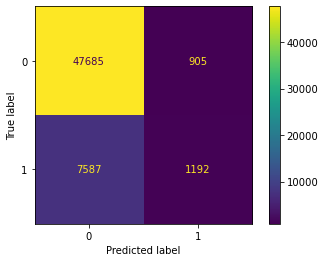

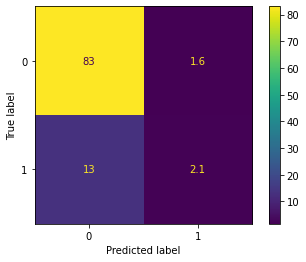

In [189]:
cm = confusion_matrix(yVal, (yValPred > 0.5).astype(int))
cmprob = np.round(100 * cm / len(yVal), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()

In [ ]:
# creating preprocesors
from sklearn.preprocessing import OneHotEncoder, StandardScaler
catPreprocessor = OneHotEncoder(handle_unknown="ignore")
numPreprocessor = StandardScaler()

# Transforming the data
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    ('one-hot-encoder', catPreprocessor, categoricalCols)],remainder="passthrough")
    #('one-hot-encoder', catPreprocessor, categoricalCols),
    #('standard_scaler', numPreprocessor, numericalCols)])
    


In [ ]:
# creating the model
from sklearn.pipeline import make_pipeline
model = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30))

model.fit(dfTrain, yTrain)

### UnderSampling

In [174]:
df, _,_,_,_,_,_,_,_ = binaryBalancedData()
target = df.diabetes
data = df.drop(columns=['diabetes'])
#nm = NearMiss()
nm = NearMiss(version = 1 , n_neighbors = 5)

X_res, y_res = nm.fit_resample(data, target)
X_res.shape, y_res.shape

((70194, 21), (70194,))

In [175]:
X_trainFull , X_test , Y_trainFull , Y_test = train_test_split(X_res,y_res, test_size=0.2 , random_state=42)
X_train , X_val , Y_train , Y_val = train_test_split(X_res,y_res, test_size=0.25 , random_state=42)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)
X_val = scalar.fit_transform(X_val)

In [176]:
lg = LogisticRegression(max_iter = 1200)
lg.fit(X_train , Y_train)

# make predictions on test set
y_pred=lg.predict(X_val)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_val, Y_val)))

Training set score: 0.8482
Test set score: 0.8453


Val prediction: [0. 0. 1. ... 1. 0. 0.]
Val RMSE: 0.39333150149291435
Val AUC: 0.8455082222409083
#######
Test prediction: [0. 0. 1. ... 0. 0. 0.]
Test RMSE: 0.3932437461937661
Test AUC: 0.8454454077423313
#######
Train prediction: [0. 1. 1. ... 1. 0. 0.]
Train RMSE: 0.38967586394831966
Train AUC: 0.8480900236654181
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      8751
         1.0       0.91      0.76      0.83      8798

    accuracy                           0.85     17549
   macro avg       0.85      0.85      0.84     17549
weighted avg       0.85      0.85      0.84     17549

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.80      0.93      0.76      0.86      0.84      0.72      8751
        1.0       0.91      0.76      0.93      0.83      0.84      0.70      8798

avg / total       0.85      0.85      0.85      0.84      0.84      0.71     17549



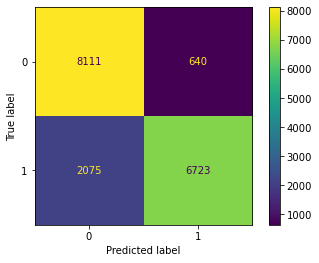

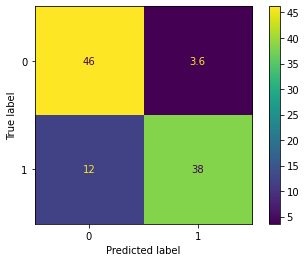

In [177]:
y_pred=lg.predict(X_val)
print(f'Val prediction: {y_pred}')
print(f'Val RMSE: {mean_squared_error(Y_val, y_pred,squared=False)}')
print(f'Val AUC: {roc_auc_score(Y_val,y_pred)}')
print('#######')
y_Testpred=lg.predict(X_test)
print(f'Test prediction: {y_Testpred}')
print(f'Test RMSE: {mean_squared_error(Y_test, y_Testpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(Y_test, y_Testpred)}')
print('#######')
y_predTrain=lg.predict(X_train)
print(f'Train prediction: {y_predTrain}')
print(f'Train RMSE: {mean_squared_error(Y_train, y_predTrain,squared=False)}')
print(f'Train AUC: {roc_auc_score(Y_train,y_predTrain)}')

cm = confusion_matrix(Y_val, y_pred)
cmprob = np.round(100 * cm / len(Y_val), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()

print(classification_report(Y_val, y_pred))
print(classification_report_imbalanced(Y_val, y_pred))

Val prediction: [1. 1. 1. ... 1. 1. 1.]
Val RMSE: 0.9203114168264745
Val AUC: 0.5
#######
Test prediction: [1. 1. 1. ... 1. 1. 1.]
Test RMSE: 0.9206566525956482
Test AUC: 0.5
#######
Train prediction: [1. 1. 1. ... 1. 1. 1.]
Train RMSE: 0.9203704272555423
Train AUC: 0.5
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     48590
         1.0       0.15      1.00      0.27      8779

    accuracy                           0.15     57369
   macro avg       0.08      0.50      0.13     57369
weighted avg       0.02      0.15      0.04     57369

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.00      0.00      1.00      0.00      0.00      0.00     48590
        1.0       0.15      1.00      0.00      0.27      0.00      0.00      8779

avg / total       0.02      0.15      0.85      0.04      0.00      0.00     57369



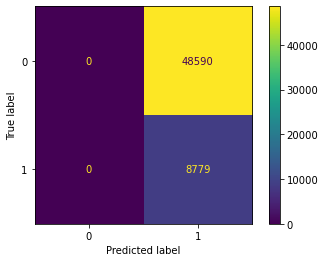

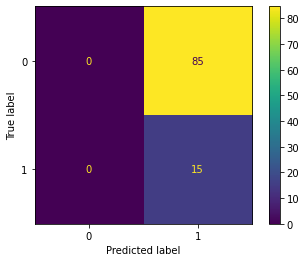

In [178]:
y_pred=lg.predict(dfVal)
print(f'Val prediction: {y_pred}')
print(f'Val RMSE: {mean_squared_error(yVal, y_pred,squared=False)}')
print(f'Val AUC: {roc_auc_score(yVal, y_pred)}')
print('#######')
y_Testpred=lg.predict(dfTest)
print(f'Test prediction: {y_Testpred}')
print(f'Test RMSE: {mean_squared_error(yTest, y_Testpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, y_Testpred)}')
print('#######')
y_predTrain=lg.predict(dfTrain)
print(f'Train prediction: {y_predTrain}')
print(f'Train RMSE: {mean_squared_error(yTrain, y_predTrain,squared=False)}')
print(f'Train AUC: {roc_auc_score(yTrain,y_predTrain)}')

cm = confusion_matrix(yVal, y_pred)
cmprob = np.round(100 * cm / len(yVal), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()

print(classification_report(yVal, y_pred))
print(classification_report_imbalanced(yVal, y_pred))

In [179]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [180]:
target = df.diabetes
data = df.drop(columns=['diabetes'])
#nm = NearMiss()
nm = RandomUnderSampler(random_state=0)

X_res, y_res = nm.fit_resample(data, target)
X_res.shape, y_res.shape

((70194, 21), (70194,))

In [181]:
X_trainFull , X_test , Y_trainFull , Y_test = train_test_split(X_res,y_res, test_size=0.2 , random_state=42)
X_train , X_val , Y_train , Y_val = train_test_split(X_res,y_res, test_size=0.25 , random_state=42)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)
X_val = scalar.fit_transform(X_val)

In [182]:
lg = LogisticRegression(max_iter = 1200)
lg.fit(X_train , Y_train)

# make predictions on test set
y_pred=lg.predict(X_val)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_val, Y_val)))

Training set score: 0.7323
Test set score: 0.7295


Val prediction: [0. 1. 0. ... 1. 0. 0.]
Val RMSE: 0.5200958984409823
Val AUC: 0.7294435275009911
Test prediction: [0. 1. 0. ... 1. 0. 1.]
Test RMSE: 0.5199900276841342
Test AUC: 0.7295869261834254
Train prediction: [0. 1. 1. ... 1. 0. 1.]
Train RMSE: 0.5174144682731103
Train AUC: 0.7323008105892883
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72      8751
         1.0       0.72      0.75      0.74      8798

    accuracy                           0.73     17549
   macro avg       0.73      0.73      0.73     17549
weighted avg       0.73      0.73      0.73     17549

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.74      0.71      0.75      0.72      0.73      0.53      8751
        1.0       0.72      0.75      0.71      0.74      0.73      0.53      8798

avg / total       0.73      0.73      0.73      0.73      0.73      0.53     17549



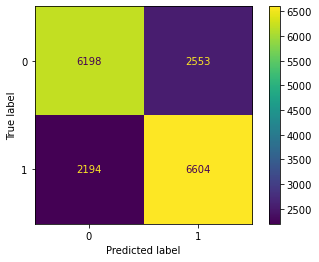

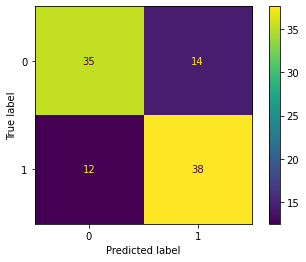

In [183]:
y_pred=lg.predict(X_val)
print(f'Val prediction: {y_pred}')
print(f'Val RMSE: {mean_squared_error(Y_val, y_pred,squared=False)}')
print(f'Val AUC: {roc_auc_score(Y_val,y_pred)}')

y_predTest=lg.predict(X_test)
print(f'Test prediction: {y_predTest}')
print(f'Test RMSE: {mean_squared_error(Y_test, y_predTest,squared=False)}')
print(f'Test AUC: {roc_auc_score(Y_test, y_predTest)}') 

y_predTrain=lg.predict(X_train)
print(f'Train prediction: {y_predTrain}')
print(f'Train RMSE: {mean_squared_error(Y_train, y_predTrain,squared=False)}')
print(f'Train AUC: {roc_auc_score(Y_train,y_predTrain)}')

cm = confusion_matrix(Y_val, y_pred)
cmprob = np.round(100 * cm / len(Y_val), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()

print(classification_report(Y_val, y_pred))
print(classification_report_imbalanced(Y_val, y_pred))

Val prediction: [1. 1. 1. ... 1. 1. 1.]
Val RMSE: 0.9203114168264745
Val AUC: 0.5
#######
Test prediction: [1. 1. 1. ... 1. 1. 1.]
Test RMSE: 0.9206566525956482
Test AUC: 0.5
#######
Train prediction: [1. 1. 1. ... 1. 1. 1.]
Train RMSE: 0.9203704272555423
Train AUC: 0.5
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     48590
         1.0       0.15      1.00      0.27      8779

    accuracy                           0.15     57369
   macro avg       0.08      0.50      0.13     57369
weighted avg       0.02      0.15      0.04     57369

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.00      0.00      1.00      0.00      0.00      0.00     48590
        1.0       0.15      1.00      0.00      0.27      0.00      0.00      8779

avg / total       0.02      0.15      0.85      0.04      0.00      0.00     57369



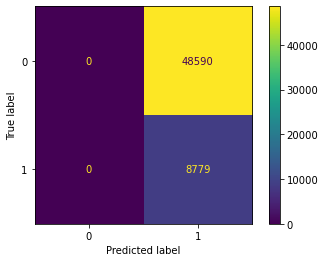

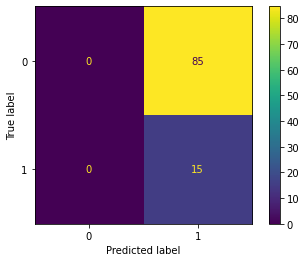

In [184]:
y_pred=lg.predict(dfVal)
print(f'Val prediction: {y_pred}')
print(f'Val RMSE: {mean_squared_error(yVal, y_pred,squared=False)}')
print(f'Val AUC: {roc_auc_score(yVal, y_pred)}')
print('#######')
y_Testpred=lg.predict(dfTest)
print(f'Test prediction: {y_Testpred}')
print(f'Test RMSE: {mean_squared_error(yTest, y_Testpred,squared=False)}')
print(f'Test AUC: {roc_auc_score(yTest, y_Testpred)}')
print('#######')
y_predTrain=lg.predict(dfTrain)
print(f'Train prediction: {y_predTrain}')
print(f'Train RMSE: {mean_squared_error(yTrain, y_predTrain,squared=False)}')
print(f'Train AUC: {roc_auc_score(yTrain,y_predTrain)}')

cm = confusion_matrix(yVal, y_pred)
cmprob = np.round(100 * cm / len(yVal), 1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0', '1']).plot()
cm_display = ConfusionMatrixDisplay(cmprob, display_labels=['0', '1']).plot()

print(classification_report(yVal, y_pred))
print(classification_report_imbalanced(yVal, y_pred))

In [ ]:
from sklearn.datasets import load_iris
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.svm import LinearSVC
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.preprocessing import StandardScaler
>>> from sklearn.pipeline import make_pipeline
>>> from sklearn.ensemble import StackingClassifier
>>> X, y = load_iris(return_X_y=True)

In [ ]:
estimators = [
...     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
...     ('svr', make_pipeline(StandardScaler(),
...                           LinearSVC(random_state=42)))
... ]

In [ ]:
estimators = [
...     ('rf1', RandomForestClassifier(n_estimators=10, max_depth=20, random_state=42)),
...     ('rf2', RandomForestClassifier(n_estimators=10, max_depth=3, random_state=45))
... ]

In [ ]:
clf = StackingClassifier(
...     #estimators=estimators, final_estimator=LogisticRegression()
        estimators=estimators, final_estimator=RandomForestClassifier()
... )

In [ ]:
from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, stratify=y, random_state=42
... )
>>> clf.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
clf.get_params

In [ ]:
from sklearn.svm import SVC
>>> from sklearn.ensemble import BaggingClassifier
>>> from sklearn.datasets import make_classification
>>> X, y = make_classification(n_samples=100, n_features=4,
...                            n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)
>>> clf = BaggingClassifier(base_estimator=SVC(),
...                         n_estimators=10, random_state=0).fit(X, y)
>>> clf.predict([[0, 0, 0, 0]])

In [ ]:
pd.DataFrame(y).value_counts()

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(data)

In [ ]:
steps = [ ('scale', StandardScaler()), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2)
scores = pd.DataFrame.from_dict( cross_validate(pipeline, dfTrainFull, yTrainFull, cv=cv,
                         scoring=('f1', 
                                  'recall' , 
                                  'precision', 
                                  'precision_micro',
                                  'accuracy', 
                                  'roc_auc'),
                         return_train_score=True))
                                
scores = scores.mean(axis=0)     
scores

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay

fig, ax = plt.subplots(figsize=(8, 8))
fpr, tpr, _ = roc_curve(yVal.values, yValPredProba)
roc_display1 = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax)
#fpr2, tpr2, _ = roc_curve(yVal, targetRand)
#roc_display2 = RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot(ax=ax)

plt.show()